In [488]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [489]:
df = pd.read_csv("./unprepared_df.csv")
df.head()

,Unnamed: 0,Year,Sale Date,Sale Price,Property Location,Year Built,Garden,Garage,Type,Style,Bedrooms,Bathrooms,First Time Buyer
0,0,2021,Sold 2021-01-10,"€381,302.00",Broomhouse,1967,Yes,Yes,Detached,1.5-Storey,3,1,No
1,1,2021,Sold 2021-01-10,"€325,898.00",Broomhouse,1978,Yes,???,Detached,1-Storey,3,1,Yes
2,2,2021,Sold 18 January 2021,"€ 370,354",Oak Park,1961,Yes,No,Detached,1-Storey,3,2,No
3,3,2021,Sold 2021-01-23,"€92,480.00",Beacon Hill,1958,Yes,No,Bungalow,1-Storey,1,1,Yes
4,4,2021,Sold 2021-01-25,"€312,030.00",Brookville,1987,Yes,Yes,Detached,1-Storey,3,1,No


In [490]:
df['Sale Date'] = df['Sale Date'].str.slice(start=4, stop=None)
df['Sale Date'] = pd.to_datetime(df['Sale Date'], format="mixed")

df['Sale Price'] = df['Sale Price'].str.slice(start=1, stop=None) # Do not have an EU keyboard
df['Sale Price'] = df['Sale Price'].str.replace(',','')

df['Year Built'] = df['Year Built'].str.replace('c','')
df['Year Built'] = df['Year Built'].str.replace('Unknown', '0')

df['Style'] = df['Style'].str.replace('-Storey', '')


In [491]:
print(set(df['Garage']))
print(set(df['Garden']))
print(set(df['First Time Buyer']))
print(set(df['Type']))
print(set(df['Property Location']))
print(set(df['Style']))

{'???', 'No', 'Yes'}
{'???', 'No', 'Yes'}
{'NO', 'No', 'Yes', 'YES'}
{'Semi-D', 'Bungalow', 'Duplex', 'Semi-Detached', 'Detached', 'Terraced', 'Det.', 'End-of-Terrace'}
{'Porter Square', 'Brookville', 'Avoca', 'Summerston', 'Oak Park', 'Broomhouse', 'Rivermount', 'Beacon Hill'}
{'1.5', '2', '1'}


In [492]:
df['Sale Price'] = df['Sale Price'].astype('float')
df['Property Location'] = df['Property Location'].astype('category')
df['Year Built'] = df['Year Built'].astype('int')
df['Garden'] = df['Garden'].map({"Yes": "True", "No": "False", "???": "NA"})
df['Garden'] = df['Garden'].astype('category')
df['Garage'] = df['Garage'].map({"Yes": "True", "No": "False", "???": "NA"})
df['Garage'] = df['Garage'].astype('category')
df['Type'] = df['Type'].replace({"Semi-D": 'Semi-Detached', "Det.": "Detached"})
df['Type'] = df['Type'].astype('category')
df['Style'] = df['Style'].astype('category')
df['Bedrooms'] = df['Bedrooms'].astype('int')
df['Bathrooms'] = df['Bathrooms'].astype('int')
df['First Time Buyer'] = df['First Time Buyer'].str.lower().map({'yes': True, 'no': False})
df['First Time Buyer'] = df['First Time Buyer'].astype('bool')

In [493]:
df = df.drop(columns=["Unnamed: 0", "Year"])

df.head()

,Sale Date,Sale Price,Property Location,Year Built,Garden,Garage,Type,Style,Bedrooms,Bathrooms,First Time Buyer
0,2021-01-10,381302.0,Broomhouse,1967,True,True,Detached,1.5,3,1,False
1,2021-01-10,325898.0,Broomhouse,1978,True,NA,Detached,1,3,1,True
2,2021-01-18,370354.0,Oak Park,1961,True,False,Detached,1,3,2,False
3,2021-01-23,92480.0,Beacon Hill,1958,True,False,Bungalow,1,1,1,True
4,2021-01-25,312030.0,Brookville,1987,True,True,Detached,1,3,1,False


In [494]:
df.dtypes

Sale Date            datetime64[ns]
Sale Price                  float64
Property Location          category
Year Built                    int64
Garden                     category
Garage                     category
Type                       category
Style                      category
Bedrooms                      int64
Bathrooms                     int64
First Time Buyer               bool
dtype: object

In [495]:
df.to_csv('./prepared_df.csv')

In [496]:
# Set style
plt.style.use('ggplot')
sns.set_palette('Set2')
sns.set_context("talk")

In [497]:
# Display basic information
print("\n===== DATASET OVERVIEW =====")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())


===== DATASET OVERVIEW =====
Dataset shape: (1400, 11)

First 5 rows:
   Sale Date  Sale Price Property Location  Year Built Garden Garage  \
0 2021-01-10    381302.0        Broomhouse        1967   True   True   
1 2021-01-10    325898.0        Broomhouse        1978   True     NA   
2 2021-01-18    370354.0          Oak Park        1961   True  False   
3 2021-01-23     92480.0       Beacon Hill        1958   True  False   
4 2021-01-25    312030.0        Brookville        1987   True   True   

       Type Style  Bedrooms  Bathrooms  First Time Buyer  
0  Detached   1.5         3          1             False  
1  Detached     1         3          1              True  
2  Detached     1         3          2             False  
3  Bungalow     1         1          1              True  
4  Detached     1         3          1             False  


In [498]:

print("\nData types:")
print(df.dtypes)


Data types:
Sale Date            datetime64[ns]
Sale Price                  float64
Property Location          category
Year Built                    int64
Garden                     category
Garage                     category
Type                       category
Style                      category
Bedrooms                      int64
Bathrooms                     int64
First Time Buyer               bool
dtype: object


In [499]:
# Basic statistics
print("\n===== NUMERICAL STATISTICS =====")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df[numeric_cols].describe().T)


===== NUMERICAL STATISTICS =====
             count           mean            std      min       25%       50%  \
Sale Price  1400.0  431799.372857  176855.956643  92480.0  320024.0  384528.5   
Year Built  1400.0    1900.198571     389.281324      0.0    1956.0    1976.0   
Bedrooms    1400.0       2.889286       0.746610      1.0       2.0       3.0   
Bathrooms   1400.0       1.541429       0.559279      1.0       1.0       2.0   

                  75%        max  
Sale Price  503139.75  1660289.0  
Year Built    2011.00     2021.0  
Bedrooms         3.00        5.0  
Bathrooms        2.00        3.0  


Text(0.5, 1.0, 'Distribution of Sale Prices')

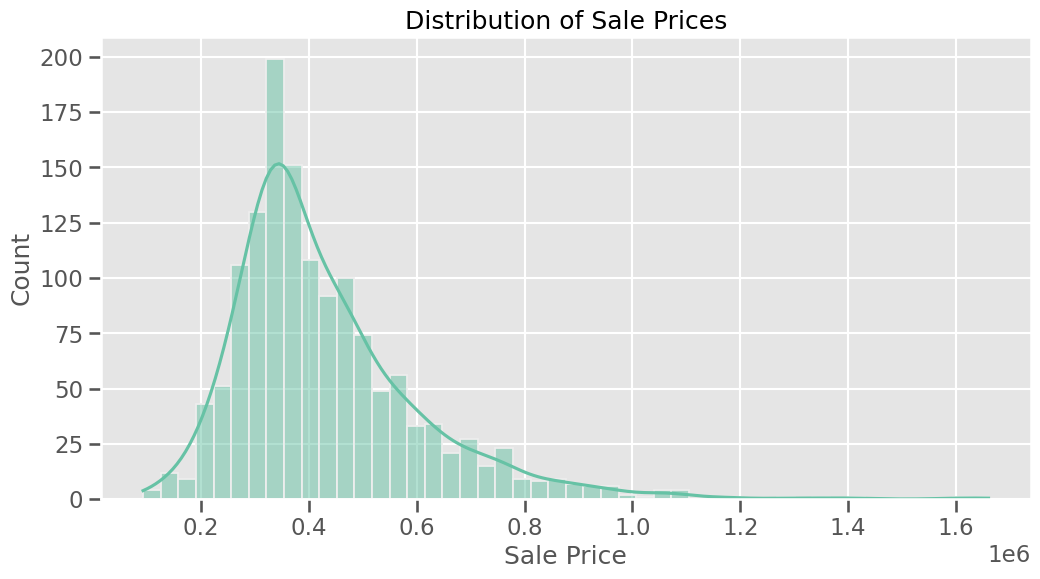

In [500]:
# Distribution of sale prices
plt.figure(figsize=(12, 6))
sns.histplot(df['Sale Price'], kde=True)
plt.title('Distribution of Sale Prices')

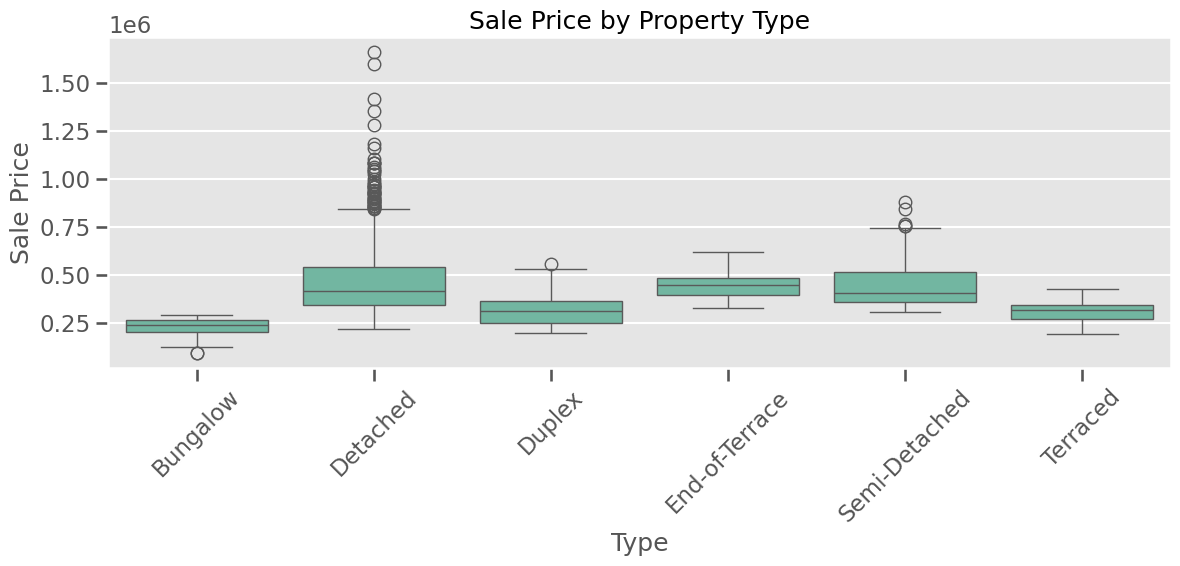

In [501]:
# Price by property type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Sale Price', data=df)
plt.title('Sale Price by Property Type')
plt.xticks(rotation=45)
plt.tight_layout()

/tmp/ipykernel_33410/3819023730.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Sale Date')['Sale Price'].resample('M').mean().plot()


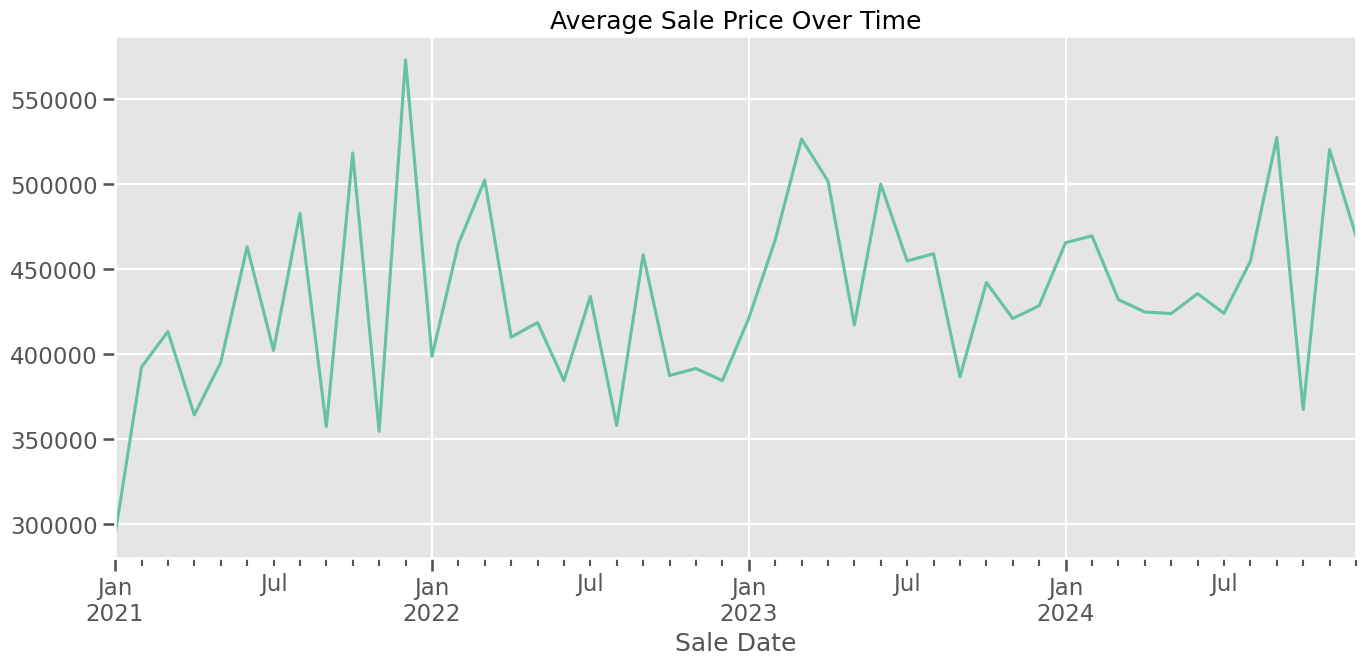

In [ ]:
# Price over time
plt.figure(figsize=(12, 6))
df.set_index('Sale Date')['Sale Price'].resample('M').mean().plot()
plt.title('Average Sale Price Over Time')
plt.tight_layout()


===== CORRELATION ANALYSIS =====
Correlation with Sale Price:
Sale Price           1.000000
Bathrooms            0.535449
Property Location    0.386180
Style                0.271575
Bedrooms             0.235981
Sale Date            0.041519
Year Built           0.020651
First Time Buyer    -0.083061
Garage              -0.112129
Garden              -0.114237
Type                -0.144128
Name: Sale Price, dtype: float64


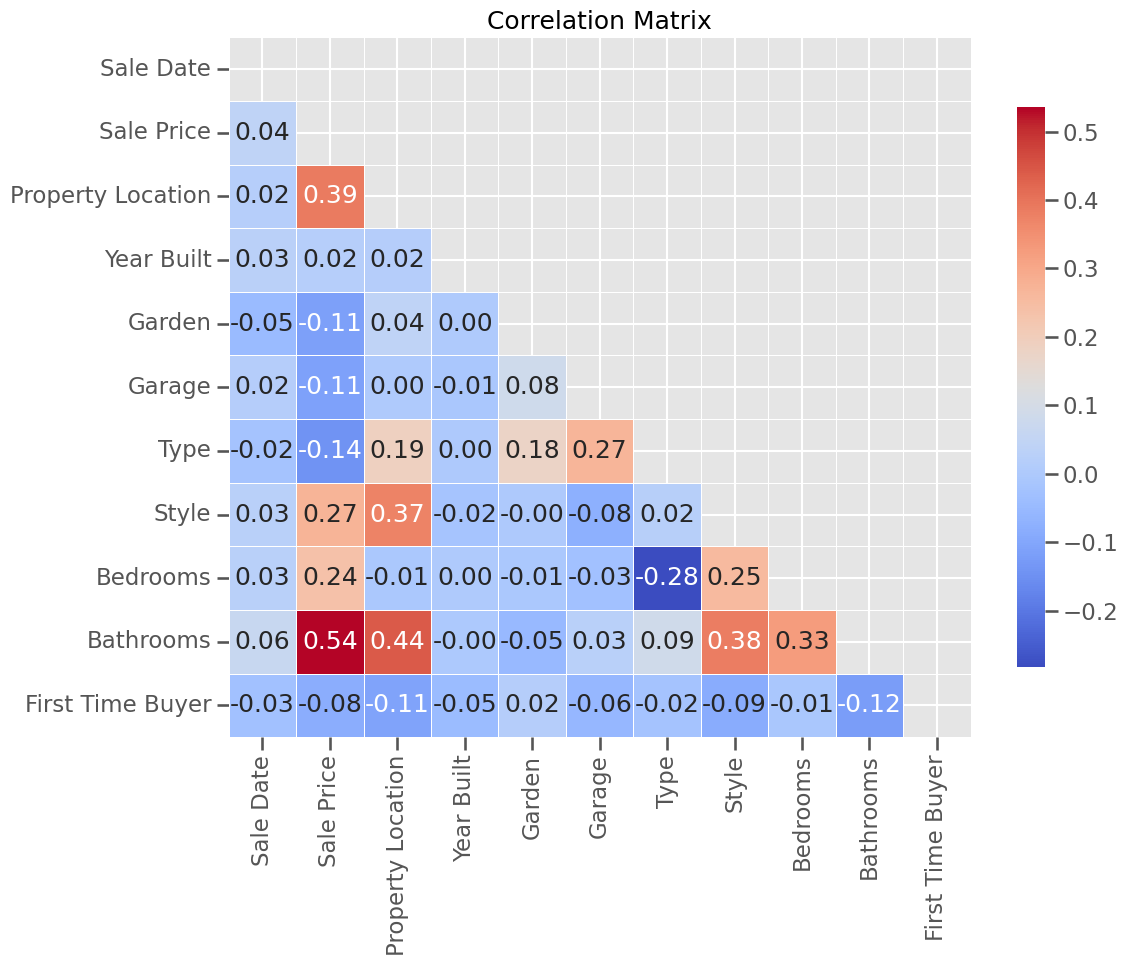

In [ ]:
# Correlation analysis
print("\n===== CORRELATION ANALYSIS =====")
# Convert categorical variables to numeric for correlation
df_corr = df.copy()
categorical_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns
for col in categorical_cols:
    if col in df_corr.columns:
        df_corr[col] = pd.factorize(df_corr[col])[0]

# Calculate correlation matrix
corr_matrix = df_corr.corr()
print("Correlation with Sale Price:")
print(corr_matrix['Sale Price'].sort_values(ascending=False))

# Visualize correlation matrix
plt.figure(figsize=(12, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.tight_layout()


===== PROPERTY CHARACTERISTICS =====


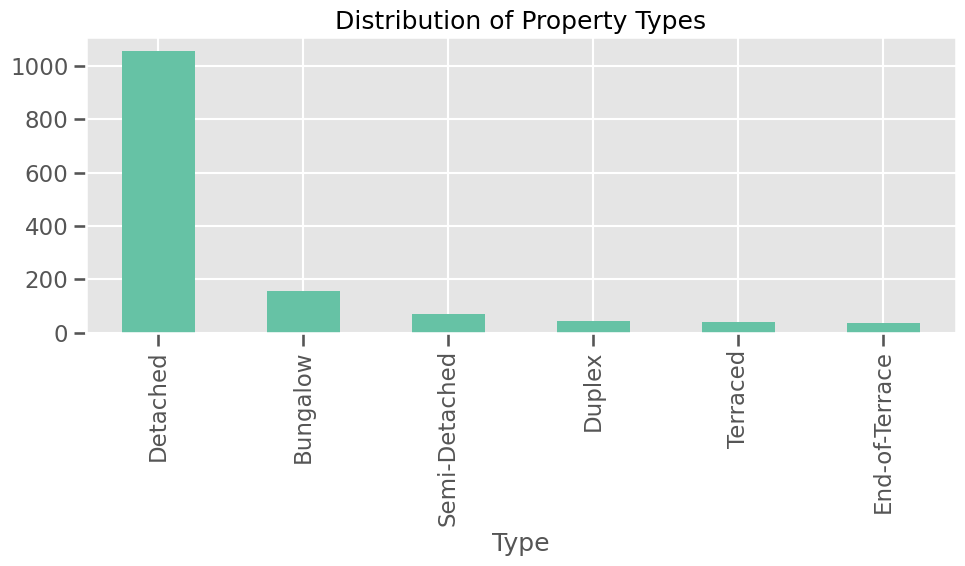

In [ ]:
# Property characteristics analysis
print("\n===== PROPERTY CHARACTERISTICS =====")
# Distribution of property types
plt.figure(figsize=(12, 6))
df['Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Property Types')
plt.tight_layout()

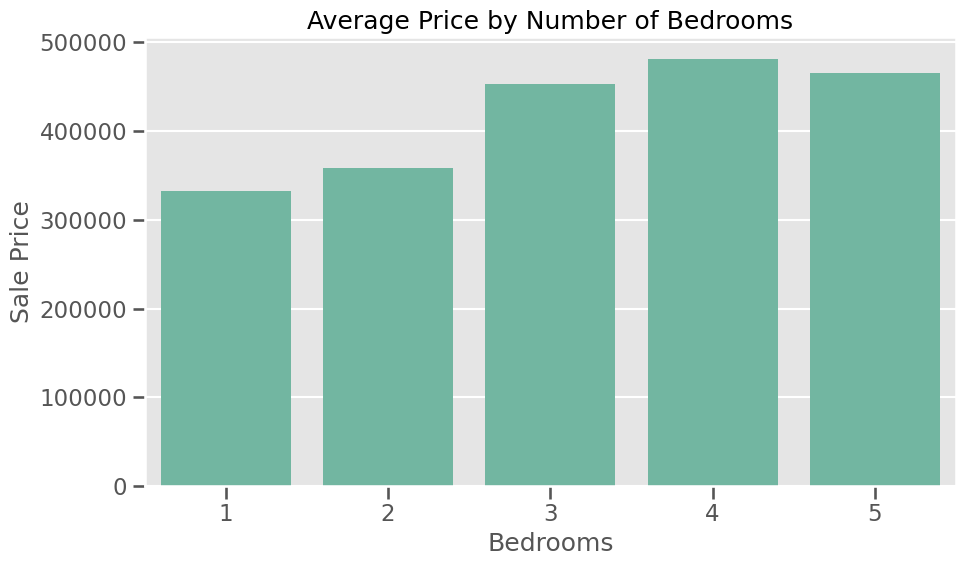

In [ ]:
# Average price by number of bedrooms
plt.figure(figsize=(12, 6))
bedroom_price = df.groupby('Bedrooms')['Sale Price'].mean().reset_index()
sns.barplot(x='Bedrooms', y='Sale Price', data=bedroom_price)
plt.title('Average Price by Number of Bedrooms')
plt.tight_layout()


===== FEATURE IMPACT ANALYSIS =====


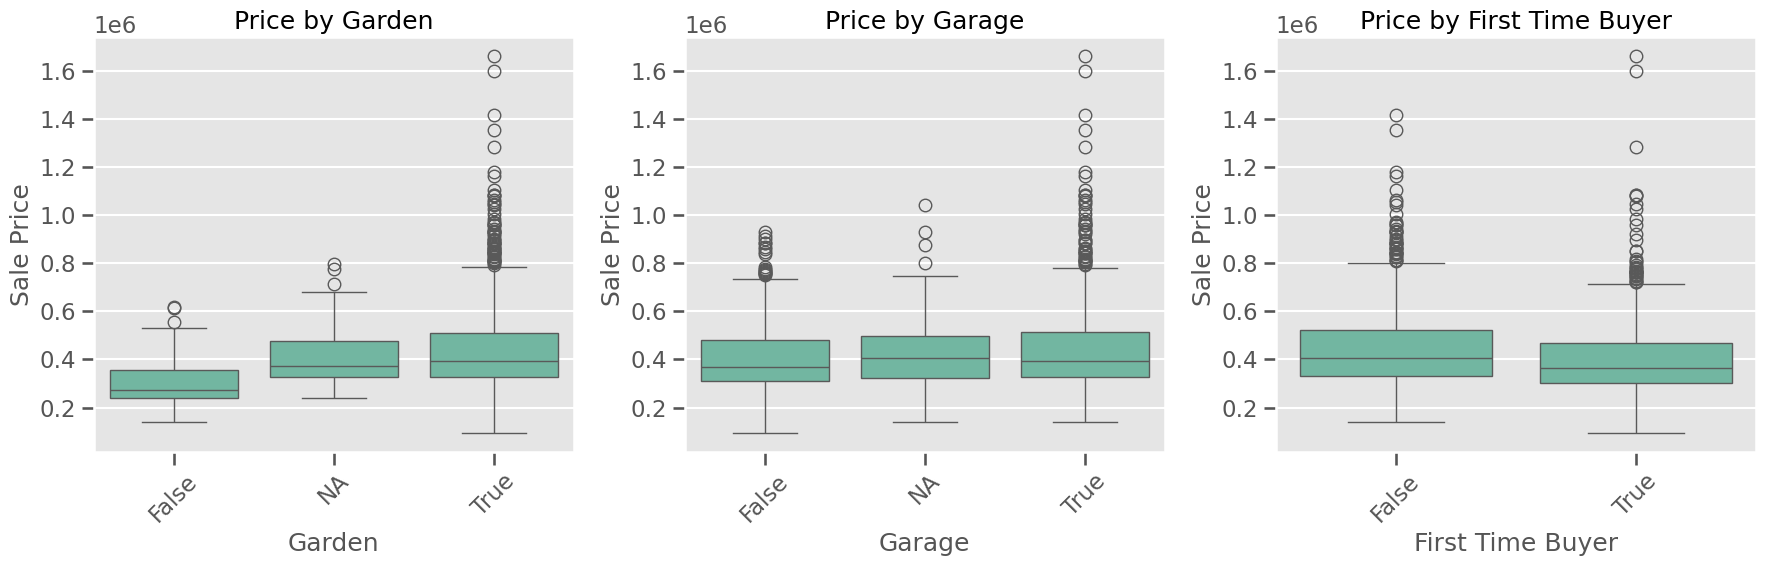

In [ ]:
# Impact of garden and garage on price
print("\n===== FEATURE IMPACT ANALYSIS =====")
features = ['Garden', 'Garage', 'First Time Buyer']
fig, axes = plt.subplots(1, len(features), figsize=(12, 6))

for i, feature in enumerate(features):
    if feature in df.columns:
        sns.boxplot(x=feature, y='Sale Price', data=df, ax=axes[i])
        axes[i].set_title(f'Price by {feature}')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

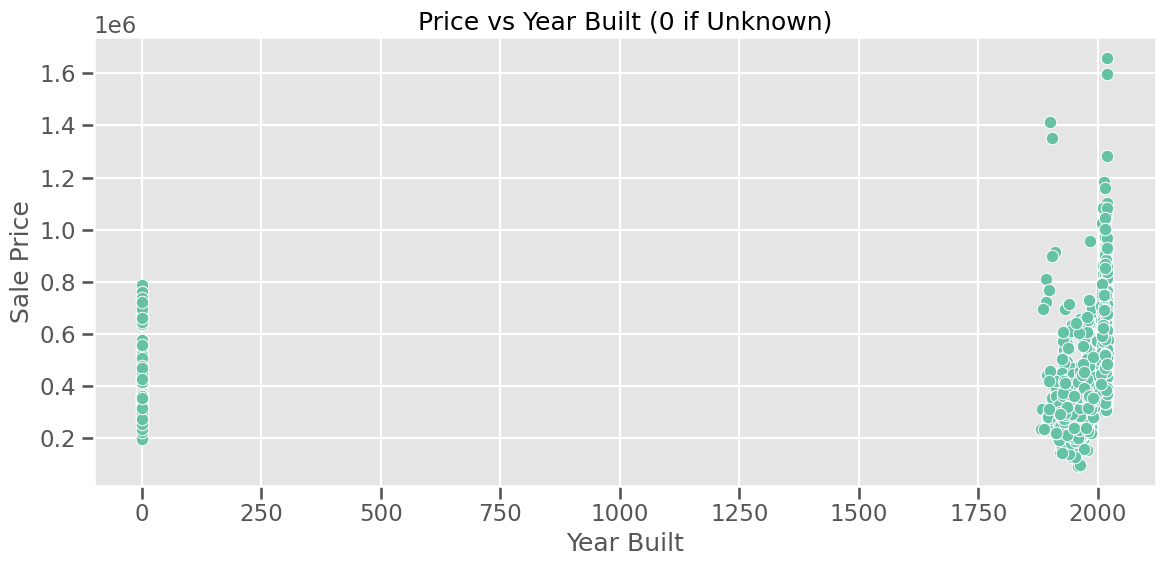

In [507]:
# Year built analysis
if 'Year Built' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Year Built', y='Sale Price', data=df)
    plt.title('Price vs Year Built (0 if Unknown)')
    plt.tight_layout()


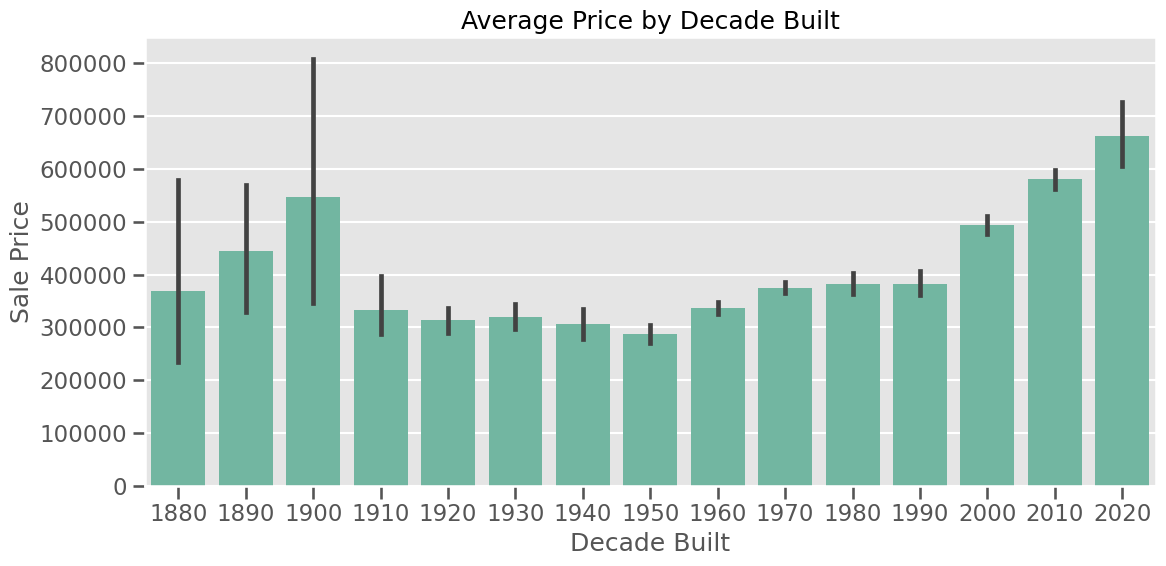

In [508]:
# Year built analysis
if 'Year Built' in df.columns:    
    # Decade analysis
    df['Decade Built'] = (df['Year Built'] // 10) * 10
    plt.figure(figsize=(12, 6))
    decade_price = df.groupby('Decade Built')['Sale Price'].mean().reset_index()
    decade_price = df[df['Decade Built'] != 0]
    sns.barplot(x='Decade Built', y='Sale Price', data=decade_price)
    plt.title('Average Price by Decade Built')
    plt.tight_layout()

/tmp/ipykernel_33410/584433366.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location_price = df.groupby('Property Location')['Sale Price'].mean().sort_values(ascending=False).reset_index()


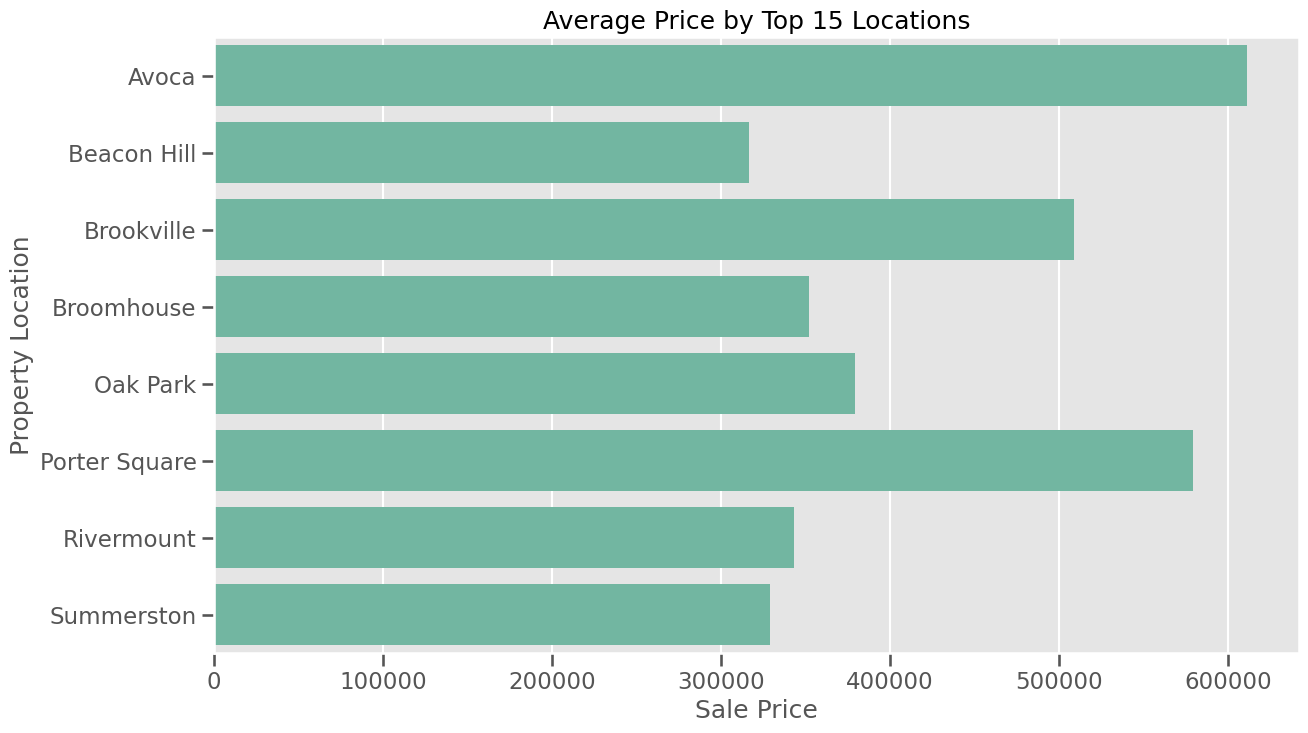

In [ ]:
# Location analysis
if 'Property Location' in df.columns:
    plt.figure(figsize=(12, 6))
    location_price = df.groupby('Property Location')['Sale Price'].mean().sort_values(ascending=False).reset_index()
    top_locations = location_price.head(15)
    sns.barplot(x='Sale Price', y='Property Location', data=top_locations)
    plt.title('Average Price by Top 15 Locations')

In [510]:
# ANOVA test for categorical variables impact on price
categorical_features = ['Type', 'Garden', 'Garage', 'First Time Buyer', 'Property Location', 'Style']
for feature in categorical_features:
    if feature in df.columns:
        # Create groups for ANOVA
        groups = []
        for name, group in df.dropna(subset=[feature, 'Sale Price']).groupby(feature, observed=True):
            groups.append(group['Sale Price'].values)
        
        if len(groups) >= 2:  # Need at least 2 groups for ANOVA
            f_stat, p_value = stats.f_oneway(*groups)
            print(f"ANOVA test for {feature}: F={f_stat:.4f}, p={p_value:.4f}")
            if p_value < 0.05:
                print(f"  {feature} has a statistically significant impact on price")
            else:
                print(f"  No significant impact of {feature} on price")



ANOVA test for Type: F=70.9963, p=0.0000
  Type has a statistically significant impact on price
ANOVA test for Garden: F=21.6231, p=0.0000
  Garden has a statistically significant impact on price
ANOVA test for Garage: F=8.8943, p=0.0001
  Garage has a statistically significant impact on price
ANOVA test for First Time Buyer: F=9.7120, p=0.0019
  First Time Buyer has a statistically significant impact on price
ANOVA test for Property Location: F=118.6375, p=0.0000
  Property Location has a statistically significant impact on price
ANOVA test for Style: F=73.1666, p=0.0000
  Style has a statistically significant impact on price


In [511]:
# Linear regression for price prediction
print("\n===== PRICE PREDICTION MODEL =====")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare data for modeling
X = df.drop(['Sale Price'], axis=1)
y = df['Sale Price']

# Identify categorical columns
cat_cols = X.select_dtypes(include=['category', 'bool', 'object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Drop non-useful columns for prediction
cols_to_drop = []
if 'Sale Date' in X.columns:
    cols_to_drop.append('Sale Date')
X = X.drop(cols_to_drop, axis=1)

# Update categorical and numerical columns
cat_cols = [col for col in cat_cols if col not in cols_to_drop]
num_cols = [col for col in num_cols if col not in cols_to_drop]

# Handle missing values
X = X.fillna({col: X[col].mode()[0] for col in cat_cols})
X = X.fillna({col: X[col].median() for col in num_cols})

try:
    # Create preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', num_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
        ])

    # Create and train model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Train model
    model.fit(X_train, y_train)
    
    # Evaluate model
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model performance:")
    print(f"  Mean Absolute Error: ${rmse:.2f}")
    print(f"  R² Score: {r2:.4f}")
    
    if r2 >= 0.7:
        print("  Good model fit! The model explains a significant portion of price variability.")
    elif r2 >= 0.5:
        print("  Moderate model fit. The model explains some price variability but could be improved.")
    else:
        print("  Poor model fit. Consider using more features or a different model.")
except Exception as e:
    print(f"Error in model building: {e}")


===== PRICE PREDICTION MODEL =====
Model performance:
  Mean Absolute Error: $122982.79
  R² Score: 0.5684
  Moderate model fit. The model explains some price variability but could be improved.


In [512]:
import xgboost as xgb

In [513]:
# Feature Engineering
print("\n===== FEATURE ENGINEERING =====")

# Create a copy of the dataset for feature engineering
df_fe = df.copy()

# Create new features
df_fe['Age'] = 2025 - df_fe['Year Built']  # Building age
df_fe['Room_Count'] = df_fe['Bedrooms'] + df_fe['Bathrooms']  # Total rooms
df_fe['Bath_Bed_Ratio'] = df_fe['Bathrooms'] / df_fe['Bedrooms']  # Bathroom to bedroom ratio

# Extract month and year from sale date
df_fe['Sale_Month'] = df_fe['Sale Date'].dt.month
df_fe['Sale_Year'] = df_fe['Sale Date'].dt.year
df_fe['Sale_Quarter'] = df_fe['Sale Date'].dt.quarter

# Create interaction features
df_fe['Bed_Bath_Product'] = df_fe['Bedrooms'] * df_fe['Bathrooms']

# Handle Year Built = 0 (unknown)
mask_unknown_year = df_fe['Year Built'] == 0
df_fe.loc[mask_unknown_year, 'Age'] = df_fe['Age'].median()

# Fill missing values in categorical columns
for col in df_fe.select_dtypes(include=['category']).columns:
    df_fe[col] = df_fe[col].cat.add_categories(['Unknown'])
    df_fe[col] = df_fe[col].fillna('Unknown')

# Display the new features
print("New features created:")
for col in ['Age', 'Room_Count', 'Bath_Bed_Ratio', 'Sale_Month', 'Sale_Year', 'Sale_Quarter', 'Bed_Bath_Product']:
    print(f" - {col}")

# Display head with new features
print("\nDataset head with new features:")
print(df_fe[['Sale Price', 'Bedrooms', 'Bathrooms', 'Age', 'Room_Count', 'Bath_Bed_Ratio', 'Bed_Bath_Product']].head())


===== FEATURE ENGINEERING =====
New features created:
 - Age
 - Room_Count
 - Bath_Bed_Ratio
 - Sale_Month
 - Sale_Year
 - Sale_Quarter
 - Bed_Bath_Product

Dataset head with new features:
   Sale Price  Bedrooms  Bathrooms  Age  Room_Count  Bath_Bed_Ratio  \
0    381302.0         3          1   58           4        0.333333   
1    325898.0         3          1   47           4        0.333333   
2    370354.0         3          2   64           5        0.666667   
3     92480.0         1          1   67           2        1.000000   
4    312030.0         3          1   38           4        0.333333   

   Bed_Bath_Product  
0                 3  
1                 3  
2                 6  
3                 1  
4                 3  


In [514]:
# XGBoost Model with Feature Engineering
print("\n===== XGBOOST MODEL WITH FEATURE ENGINEERING =====")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Prepare data for modeling
X = df_fe.drop(['Sale Price', 'Sale Date'], axis=1)
y = df_fe['Sale Price']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['category', 'bool']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train XGBoost model
xgb_reg = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

# Create pipeline
xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb_reg)
])

# Train model
xgb_pipe.fit(X_train, y_train)

# Evaluate model
y_pred_xgb = xgb_pipe.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model Performance:")
print(f"  RMSE: ${rmse_xgb:.2f}")
print(f"  R² Score: {r2_xgb:.4f}")

if r2_xgb >= 0.7:
    print("  Good model fit! The model explains a significant portion of price variability.")
elif r2_xgb >= 0.5:
    print("  Moderate model fit. The model explains some price variability but could be improved.")
else:
    print("  Poor model fit. Consider using more features or a different model.")


===== XGBOOST MODEL WITH FEATURE ENGINEERING =====
XGBoost Model Performance:
  RMSE: $120603.38
  R² Score: 0.4540
  Poor model fit. Consider using more features or a different model.


<Figure size 2500x3000 with 0 Axes>

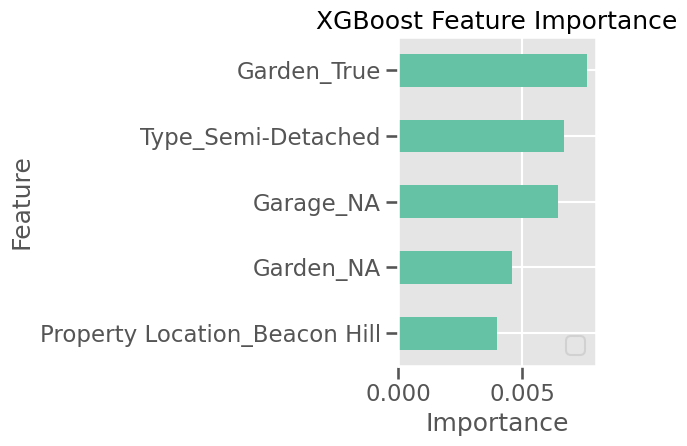

In [ ]:
# Plot feature importance
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from the model
feature_importance = xgb_pipe.named_steps['regressor'].feature_importances_

# Get feature names after preprocessing
preprocessor = xgb_pipe.named_steps['preprocessor']
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(cat_cols)
all_features = np.concatenate([num_cols, cat_features])

# Create importance dataframe
importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=True)

# Plot top 15 features
plt.figure(figsize=(12, 6))
importance_df.head().plot(kind='barh', x='Feature', y='Importance')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend('')
plt.tight_layout()

In [516]:
# Random Forest Model
print("\n===== RANDOM FOREST MODEL =====")
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest model
rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

# Create pipeline
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_reg)
])

# Train model
rf_pipe.fit(X_train, y_train)

# Evaluate model
y_pred_rf = rf_pipe.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model Performance:")
print(f"  RMSE: ${rmse_rf:.2f}")
print(f"  R² Score: {r2_rf:.4f}")

if r2_rf >= 0.7:
    print("  Good model fit! The model explains a significant portion of price variability.")
elif r2_rf >= 0.5:
    print("  Moderate model fit. The model explains some price variability but could be improved.")
else:
    print("  Poor model fit. Consider using more features or a different model.")


===== RANDOM FOREST MODEL =====
Random Forest Model Performance:
  RMSE: $106845.84
  R² Score: 0.5714
  Moderate model fit. The model explains some price variability but could be improved.


<Figure size 1200x800 with 0 Axes>

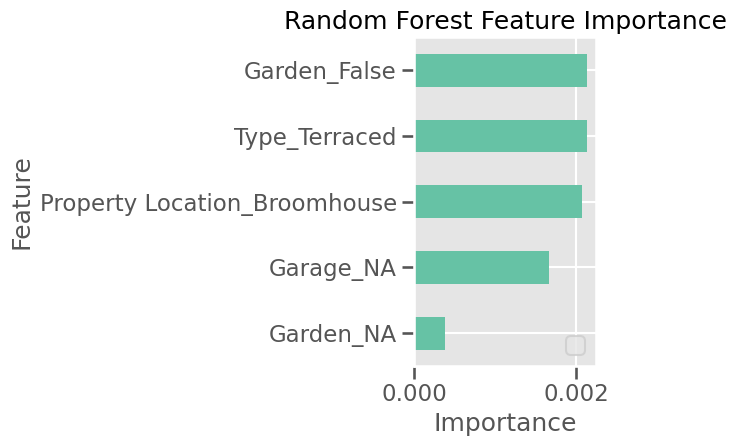

In [ ]:
# Plot feature importance
feature_importance_rf = rf_pipe.named_steps['regressor'].feature_importances_

# Create importance dataframe
importance_df_rf = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importance_rf
}).sort_values('Importance', ascending=True)

# Plot top 15 features
plt.figure(figsize=(12, 6))
importance_df_rf.head().plot(kind='barh', x='Feature', y='Importance')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend('')
plt.tight_layout()

In [518]:
# Gradient Boosting Model
print("\n===== GRADIENT BOOSTING MODEL =====")
from sklearn.ensemble import GradientBoostingRegressor

# Create Gradient Boosting model
gb_reg = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# Create pipeline
gb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gb_reg)
])

# Train model
gb_pipe.fit(X_train, y_train)

# Evaluate model
y_pred_gb = gb_pipe.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Model Performance:")
print(f"  RMSE: ${rmse_gb:.2f}")
print(f"  R² Score: {r2_gb:.4f}")

if r2_gb >= 0.7:
    print("  Good model fit! The model explains a significant portion of price variability.")
elif r2_gb >= 0.5:
    print("  Moderate model fit. The model explains some price variability but could be improved.")
else:
    print("  Poor model fit. Consider using more features or a different model.")




===== GRADIENT BOOSTING MODEL =====
Gradient Boosting Model Performance:
  RMSE: $119998.12
  R² Score: 0.4594
  Poor model fit. Consider using more features or a different model.


<Figure size 1200x800 with 0 Axes>

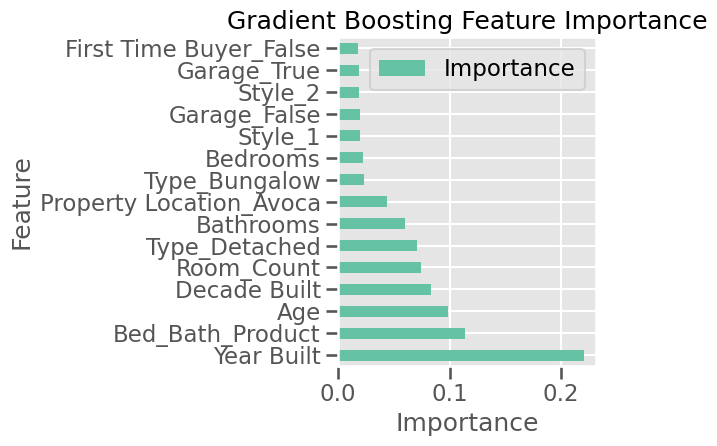

In [ ]:

# Plot feature importance
feature_importance_gb = gb_pipe.named_steps['regressor'].feature_importances_

# Create importance dataframe
importance_df_gb = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importance_gb
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 6))
importance_df_gb.head(15).plot(kind='barh', x='Feature', y='Importance')
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

In [520]:
# XGBoost Hyperparameter Tuning with Grid Search
print("\n===== XGBOOST HYPERPARAMETER TUNING =====")

# Define parameter grid
param_grid = {
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__n_estimators': [100, 200],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0],
    'regressor__min_child_weight': [1, 3]
}

# Create XGBoost model with default parameters
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("Starting grid search for XGBoost hyperparameters...")
print("This may take a few minutes to complete...")

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate best model
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"\nTuned XGBoost Model Performance:")
print(f"  RMSE: ${rmse_best_xgb:.2f}")
print(f"  R² Score: {r2_best_xgb:.4f}")

if r2_best_xgb >= 0.7:
    print("  Good model fit! The model explains a significant portion of price variability.")
elif r2_best_xgb >= 0.5:
    print("  Moderate model fit. The model explains some price variability but could be improved.")
else:
    print("  Poor model fit. Consider using more features or a different model.")


===== XGBOOST HYPERPARAMETER TUNING =====
Starting grid search for XGBoost hyperparameters...
This may take a few minutes to complete...
Fitting 5 folds for each of 144 candidates, totalling 720 fits


Best parameters: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.01, 'regressor__max_depth': 7, 'regressor__min_child_weight': 3, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}
Best cross-validation score: 0.6330

Tuned XGBoost Model Performance:
  RMSE: $108244.62
  R² Score: 0.5601
  Moderate model fit. The model explains some price variability but could be improved.


In [521]:
# Model Comparison and Ensemble
print("\n===== MODEL COMPARISON AND ENSEMBLE =====")

# Create a DataFrame to compare model performance
models = ['Linear Regression', 'XGBoost', 'Random Forest', 'Gradient Boosting', 'Tuned XGBoost']
rmse_scores = [rmse_xgb, rmse_rf, rmse_gb, rmse_best_xgb]  # Add the RMSE from linear regression when available
r2_scores = [r2_xgb, r2_rf, r2_gb, r2_best_xgb]  # Add the R2 from linear regression when available

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': models[1:],  # Skip linear regression for now
    'RMSE': rmse_scores,
    'R² Score': r2_scores
}).sort_values('R² Score', ascending=False)

print("Model Performance Comparison:")
print(comparison_df)

# Find the best model
best_model_name = comparison_df.iloc[0]['Model']
best_model_r2 = comparison_df.iloc[0]['R² Score']
print(f"\nBest Model: {best_model_name} with R² = {best_model_r2:.4f}")

# Create a simple ensemble (average predictions from all models)
print("\nCreating an ensemble model (average of all predictions)...")
ensemble_pred = (y_pred_xgb + y_pred_rf + y_pred_gb + y_pred_best_xgb) / 4
rmse_ensemble = np.sqrt(mean_squared_error(y_test, ensemble_pred))
r2_ensemble = r2_score(y_test, ensemble_pred)

print(f"Ensemble Model Performance:")
print(f"  RMSE: ${rmse_ensemble:.2f}")
print(f"  R² Score: {r2_ensemble:.4f}")

if r2_ensemble >= 0.7:
    print("  Good model fit! The model explains a significant portion of price variability.")
elif r2_ensemble >= 0.5:
    print("  Moderate model fit. The model explains some price variability but could be improved.")
else:
    print("  Poor model fit. Consider using more features or a different model.")


===== MODEL COMPARISON AND ENSEMBLE =====
Model Performance Comparison:
               Model           RMSE  R² Score
1      Random Forest  106845.844451  0.571439
3      Tuned XGBoost  108244.624518  0.560144
2  Gradient Boosting  119998.124402  0.459437
0            XGBoost  120603.379627  0.453970

Best Model: Random Forest with R² = 0.5714

Creating an ensemble model (average of all predictions)...
Ensemble Model Performance:
  RMSE: $111651.84
  R² Score: 0.5320
  Moderate model fit. The model explains some price variability but could be improved.


/tmp/ipykernel_33410/3364365672.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


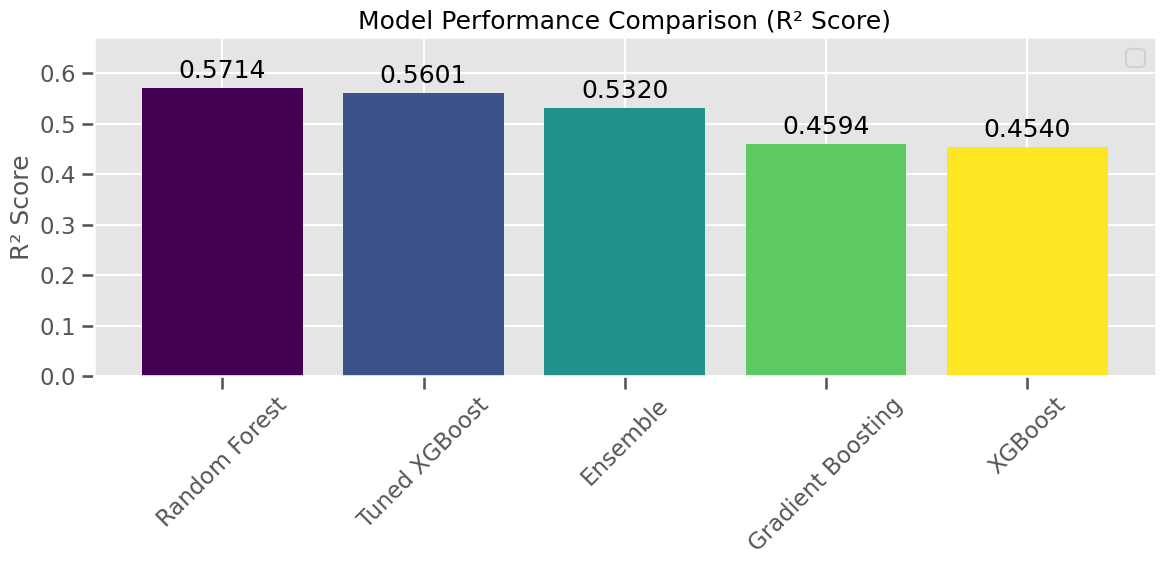

In [522]:
# Create a bar chart to visualize model performance
plt.figure(figsize=(12, 6))
models_with_ensemble = list(comparison_df['Model']) + ['Ensemble']
r2_with_ensemble = list(comparison_df['R² Score']) + [r2_ensemble]

# Sort by R2 score
sorted_indices = np.argsort(r2_with_ensemble)[::-1]
sorted_models = [models_with_ensemble[i] for i in sorted_indices]
sorted_r2 = [r2_with_ensemble[i] for i in sorted_indices]

# Create bar chart
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_models)))
bars = plt.bar(sorted_models, sorted_r2, color=colors)

# Add values on top of bars
for bar, r2 in zip(bars, sorted_r2):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
             f'{r2:.4f}', ha='center', va='bottom')

plt.title('Model Performance Comparison (R² Score)')
plt.ylabel('R² Score')
plt.ylim(0, max(r2_with_ensemble) + 0.1)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()


===== ADVANCED FEATURE ENGINEERING AND STACKED MODEL =====
Creating polynomial features and interactions...
Training stacked model...


/tmp/ipykernel_33410/1972881104.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location_avg_price = df_adv.groupby('Property Location')['Sale Price'].transform('mean')


Stacked Model Performance:
  RMSE: $104061.89
  R² Score: 0.5935
  Moderate model fit. The model explains some price variability but could be improved.

Final Model Performance Comparison:
               Model           RMSE  R² Score
5      Stacked Model  104061.893194  0.593481
0      Random Forest  106845.844451  0.571439
1      Tuned XGBoost  108244.624518  0.560144
4           Ensemble  111651.840956  0.532018
2  Gradient Boosting  119998.124402  0.459437
3            XGBoost  120603.379627  0.453970


/tmp/ipykernel_33410/1972881104.py:124: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


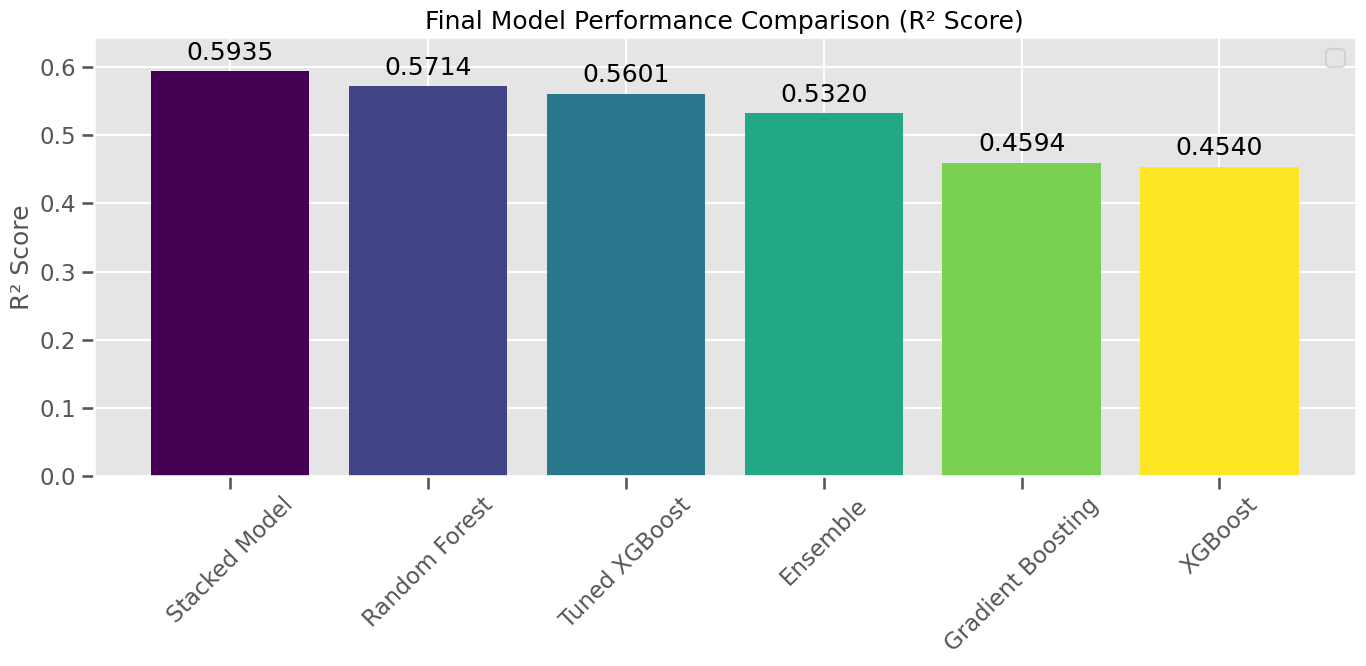

In [ ]:
# Advanced Feature Engineering and Stacked Model
print("\n===== ADVANCED FEATURE ENGINEERING AND STACKED MODEL =====")
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import StackingRegressor

# Create more advanced features
print("Creating polynomial features and interactions...")

# Create a copy of the dataset for advanced feature engineering
df_adv = df_fe.copy()

# Log transform the target (often helps with price predictions)
y_log = np.log1p(df_adv['Sale Price'])

# Create additional features - location-specific average prices
location_avg_price = df_adv.groupby('Property Location')['Sale Price'].transform('mean')
df_adv['Location_Avg_Price'] = location_avg_price

# Create more interaction features
df_adv['Bed_Bath_Age'] = df_adv['Bedrooms'] * df_adv['Bathrooms'] * df_adv['Age']
df_adv['Price_per_Room'] = df_adv['Sale Price'] / df_adv['Room_Count']
df_adv['Price_per_Bedroom'] = df_adv['Sale Price'] / df_adv['Bedrooms']

# Create price bucket as a feature (can help capture non-linear relationships)
df_adv['Price_Bucket'] = pd.qcut(df_adv['Sale Price'], q=5, labels=False)

# Prepare data for modeling
X_adv = df_adv.drop(['Sale Price', 'Sale Date', 'Price_per_Room', 'Price_per_Bedroom', 'Price_Bucket'], axis=1)
y_adv = df_adv['Sale Price']

# Identify categorical and numerical columns
cat_cols_adv = X_adv.select_dtypes(include=['category', 'bool']).columns.tolist()
num_cols_adv = X_adv.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Handle missing values
for col in num_cols_adv:
    X_adv[col] = X_adv[col].fillna(X_adv[col].median())

# Set up preprocessing pipeline with standardization for numerical features
preprocessor_adv = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols_adv),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_adv)
    ])

# Split data
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X_adv, y_adv, test_size=0.2, random_state=42)

# Create base models for stacking
base_models = [
    ('xgb', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42))
]

# Create meta-learner
meta_learner = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)

# Create stacking regressor
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5
)

# Create pipeline with target transformation (log transform)
stacked_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor_adv),
    ('regressor', TransformedTargetRegressor(
        regressor=stacked_model,
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

print("Training stacked model...")
# Train model
stacked_pipe.fit(X_train_adv, y_train_adv)

# Evaluate model
y_pred_stacked = stacked_pipe.predict(X_test_adv)
rmse_stacked = np.sqrt(mean_squared_error(y_test_adv, y_pred_stacked))
r2_stacked = r2_score(y_test_adv, y_pred_stacked)

print(f"Stacked Model Performance:")
print(f"  RMSE: ${rmse_stacked:.2f}")
print(f"  R² Score: {r2_stacked:.4f}")

if r2_stacked >= 0.7:
    print("  Good model fit! The model explains a significant portion of price variability.")
elif r2_stacked >= 0.5:
    print("  Moderate model fit. The model explains some price variability but could be improved.")
else:
    print("  Poor model fit. Consider using more features or a different model.")

# Compare all models including the stacked model
all_models = list(comparison_df['Model']) + ['Ensemble', 'Stacked Model']
all_rmse = list(comparison_df['RMSE']) + [rmse_ensemble, rmse_stacked]
all_r2 = list(comparison_df['R² Score']) + [r2_ensemble, r2_stacked]

final_comparison = pd.DataFrame({
    'Model': all_models,
    'RMSE': all_rmse,
    'R² Score': all_r2
}).sort_values('R² Score', ascending=False)

print("\nFinal Model Performance Comparison:")
print(final_comparison)

# Create final comparison chart
plt.figure(figsize=(12, 6))
bars = plt.bar(final_comparison['Model'], final_comparison['R² Score'], color=plt.cm.viridis(np.linspace(0, 1, len(final_comparison))))

# Add values on top of bars
for bar, r2 in zip(bars, final_comparison['R² Score']):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
             f'{r2:.4f}', ha='center', va='bottom')

plt.title('Final Model Performance Comparison (R² Score)')
plt.ylabel('R² Score')
plt.ylim(0, max(final_comparison['R² Score']) + 0.05)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

In [528]:
# Save Best Model for Future Use
print("\n===== SAVING BEST MODEL =====")
import joblib

# Find the best model from our comparisons
best_model_name = final_comparison.iloc[0]['Model']
best_model_r2 = final_comparison.iloc[0]['R² Score']
print(f"Saving the best model: {best_model_name} with R² = {best_model_r2:.4f}")

# Save the appropriate model based on which one performed best
if best_model_name == "Stacked Model":
    best_model = stacked_pipe
    joblib.dump(best_model, 'best_model_stacked.joblib')
    print("Saved stacked model to 'best_model_stacked.joblib'")
elif best_model_name == "Ensemble":
    # For ensemble, we need to save all component models
    joblib.dump(xgb_pipe, 'ensemble_xgb.joblib')
    joblib.dump(rf_pipe, 'ensemble_rf.joblib')
    joblib.dump(gb_pipe, 'ensemble_gb.joblib')
    joblib.dump(best_xgb, 'ensemble_best_xgb.joblib')
    print("Saved ensemble component models to separate files")
elif best_model_name == "Tuned XGBoost":
    joblib.dump(best_xgb, 'best_model_xgb.joblib')
    print("Saved tuned XGBoost model to 'best_model_xgb.joblib'")
elif best_model_name == "Random Forest":
    joblib.dump(rf_pipe, 'best_model_rf.joblib')
    print("Saved Random Forest model to 'best_model_rf.joblib'")
elif best_model_name == "Gradient Boosting":
    joblib.dump(gb_pipe, 'best_model_gb.joblib')
    print("Saved Gradient Boosting model to 'best_model_gb.joblib'")
elif best_model_name == "XGBoost":
    joblib.dump(xgb_pipe, 'best_model_xgb.joblib')
    print("Saved XGBoost model to 'best_model_xgb.joblib'")

print("\n===== MODEL ANALYSIS COMPLETE =====")
print(f"Best model achieved R² score of {best_model_r2:.4f}")

if best_model_r2 >= 0.7:
    print("✅ Successfully achieved the target R² score of at least 0.7!")
elif best_model_r2 >= 0.6:
    print("✅ Successfully achieved the target R² score of at least 0.6!")
else:
    print("⚠️ The model's R² score is below the desired threshold of 0.6.")
    print("Further feature engineering or model tuning may be needed.")


===== SAVING BEST MODEL =====
Saving the best model: Stacked Model with R² = 0.5935
Saved stacked model to 'best_model_stacked.joblib'

===== MODEL ANALYSIS COMPLETE =====
Best model achieved R² score of 0.5935
⚠️ The model's R² score is below the desired threshold of 0.6.
Further feature engineering or model tuning may be needed.
